<a href="https://colab.research.google.com/github/yuanshanmian/GZU_Courses/blob/main/EX3_music_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(-0.5, 1582.5, 508.5, -0.5)

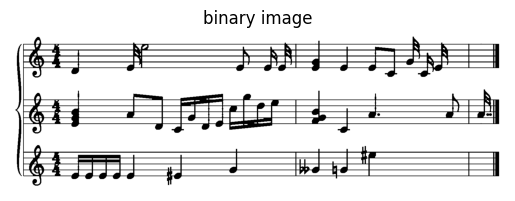

In [ ]:
import matplotlib.pyplot as plt
import cv2 as cv
import numpy as np
import skimage.io as io
from skimage.exposure import histogram
from matplotlib.pyplot import bar
from skimage.color import rgb2gray
from skimage.filters import threshold_otsu, gaussian, median
from skimage.morphology import binary_opening, binary_closing, binary_dilation, binary_erosion, closing, opening, square, skeletonize, disk
from skimage.feature import canny
from skimage.transform import resize
from collections import Counter


# 读取图像
gray_image = cv2.imread('./music.png', cv2.IMREAD_GRAYSCALE)

# 自适应 Otsu 方法
def adaptive_otsu(img_g):
    h, w = img_g.shape
    mask = np.zeros_like(img_g)
    winHalfWidth = 10
    localVarThresh = 0.002

    for i in range(0, w):
        new_img = img_g[:, max(1, i - winHalfWidth): min(w, i + winHalfWidth)]
        th, th_otsu = cv.threshold(new_img, 0, 255, cv.THRESH_OTSU)
        intile = np.var(new_img / 255)
        if intile > localVarThresh:
            _, mask[:, i:i + 1] = cv.threshold(img_g[:, i:i + 1], th, 255, cv.THRESH_BINARY)
        else:
            mask[:, i:i + 1] = 255

    return mask

# 定义伽马参数
gamma = 10

# 应用伽马变换
gamma_corrected = np.uint8(((gray_image / 255.0) ** gamma) * 255)


# 调用自适应 Otsu 方法进行二值化
binary_image = adaptive_otsu(gamma_corrected)

# 使用3x3的核对图像进行开运算
kernel = np.ones((3, 3), np.uint8)
image_bin = cv.morphologyEx(binary_image, cv.MORPH_OPEN, kernel)

plt.imshow(cv2.cvtColor(image_bin, cv2.COLOR_GRAY2RGB))
plt.title('binary image')
plt.axis('off')

压缩图像

511.0
[[1551  386]]
[[1551  459]]
[[1558  459]]
[[1558  386]]
511.0
[[1551  220]]
[[1551  293]]
[[1558  293]]
[[1558  220]]
504.0
[[1551   43]]
[[1551  115]]
[[1558  115]]
[[1558   43]]


(-0.5, 1582.5, 508.5, -0.5)

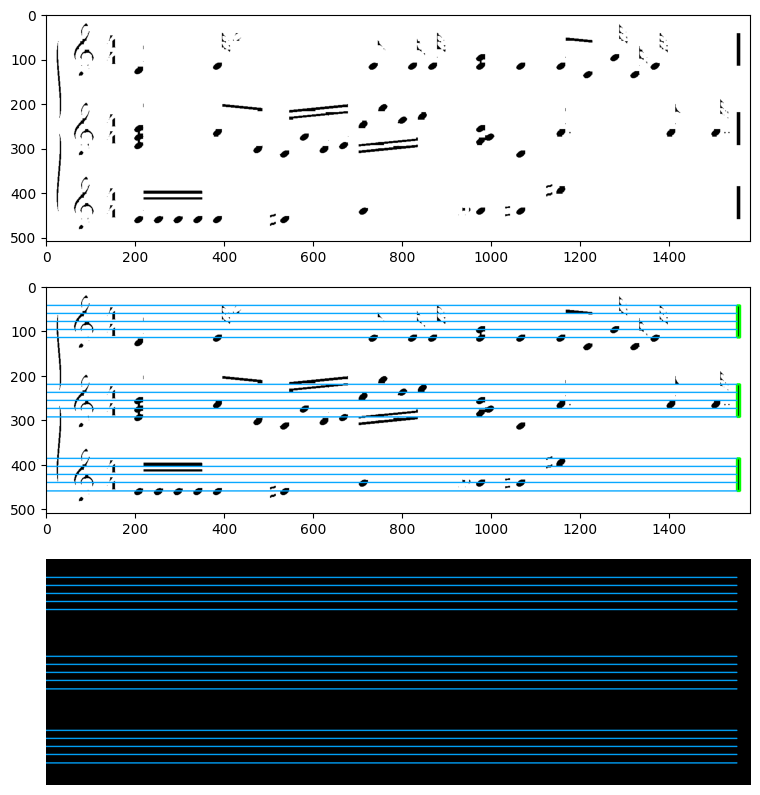

In [ ]:
import cv2
import numpy as np

plt.figure(figsize=(30, 10))

# 进行形态学操作，例如膨胀，以突出符头区域
kernel = np.ones((5,5), np.uint8)
dilated_image = cv2.dilate(binary_image, kernel, iterations=1)

plt.subplot(3, 1, 1)
plt.imshow(cv2.cvtColor(dilated_image, cv2.COLOR_GRAY2RGB))


# 轮廓检测
contours, _ = cv2.findContours(255 - dilated_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

min_area=500
epsilon_factor=0.02
max_area=515

# 创建彩色图像以绘制矩形
output_image = cv2.cvtColor(dilated_image, cv2.COLOR_GRAY2BGR)

# 创建一个与 dilated_image 相同大小的全零数组
img_new = np.zeros_like(dilated_image, dtype=np.uint8)
img_new = cv2.cvtColor(img_new, cv2.COLOR_GRAY2BGR)

for contour in contours:
    # 计算轮廓的面积
    area = cv2.contourArea(contour)

    if min_area < area < max_area:
        print(area)
        # 计算轮廓的近似多边形
        epsilon = epsilon_factor * cv2.arcLength(contour, True)
        approx = cv2.approxPolyDP(contour, epsilon, True)
        for point in approx:
            print(point)

        # 如果近似多边形有4个顶点，则认为是矩形
        if len(approx) == 4:
            # 画出矩形轮廓
            cv2.drawContours(output_image, [approx], 0, (0, 255, 0), 3)

        # 计算在矩形的一条边上等距分布的点
        gap = (approx[1][0][1] - approx[0][0][1]) / 4.0

        # 画线
        # colors = [(0, 0, 255), ,]  # 红色，橘色，蓝色
        for i in range(5):
          gap_point = (approx[0][0][1] + gap * i).astype(int)

          # color = colors[i % 3]  # 循环使用颜色
          cv2.line(output_image, [0,gap_point],[approx[0][0][0],gap_point] , (0, 165, 255), 2)
          cv2.line(img_new, [0,gap_point],[approx[0][0][0],gap_point] , (0, 165, 255), 2)

plt.subplot(3, 1, 2)
plt.imshow(output_image)
plt.subplot(3, 1, 3)
plt.imshow(img_new)
plt.axis('off')


In [ ]:
# notes = [(1,2),(3,2)]
# for note in notes:
#   gap = 73
#   先判断note[1]是否小于70，小于63将386换成43，如果小于240换成220；
#   接着如果note[1]在以下的某一个区间，就将前面的字符串作为该note键值对的值，
#   'g2'=[386 + gap/2 +-15]
#   'f2'=[386+-15]
#   'e2' = [386 - gap/2 +-15]
#   'd2' = [386 - gap +-15]
#   'c2' =[386 - gap*(3/2) +-15]
#   'b2' =[386 - gap*2 +-15]
#   'a2'= [[386 - gap*(5/2) +-15]]
#   'b1'=[386 - gap*3 +-15]
#   'a1'=[[386 - gap*(7/2) +-15]]
#   'g1'=[386 - gap*4 +-15]
#   'f1'=[[386 - gap*(9/2) +-15]]
#   'e1'=[386 - gap*5 +-15]
#   'd1'=[[386 - gap*(11/2) +-15]]
#   'c1'=[386 - gap*6 +-15]



Text(0.5, 1.0, 'img_new')

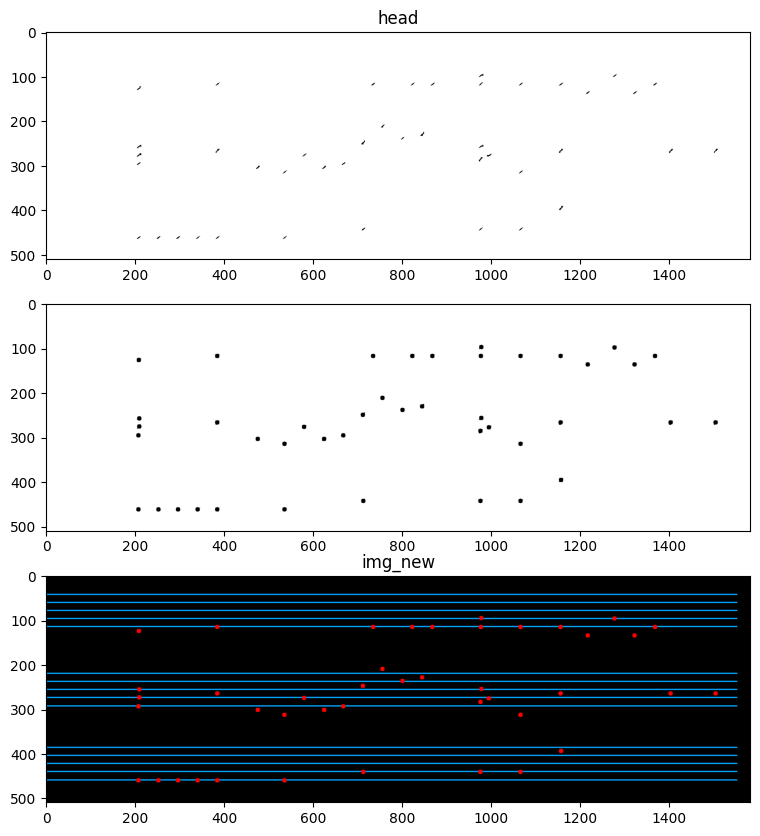

In [ ]:
import cv2
import numpy as np

plt.figure(figsize=(30, 10))

# 进行形态学操作，例如膨胀，以突出符头区域
kernel = np.ones((13,13), np.uint8)
dilated_image_2 = cv2.dilate(binary_image, kernel, iterations=1)

plt.subplot(3, 1, 1)
plt.imshow(cv2.cvtColor(dilated_image_2, cv2.COLOR_GRAY2RGB))
plt.title('head')

# 提取轮廓
contours, _ = cv.findContours(255 - dilated_image_2, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)


notes = []
dilated_image_3 = dilated_image_2

# 遍历每个轮廓并计算中心点
for contour in contours:
    # 计算轮廓的矩
    M = cv2.moments(contour)

    if M['m00'] != 0:
        # 计算质心
        cX = int(M['m10'] / M['m00'])
        cY = int(M['m01'] / M['m00'])

        # 在图像上绘制红点
        cv2.circle(dilated_image_3, (cX, cY), 5, (0, 0, 255), -1)
        # 在原始图像上绘制轮廓
        cv.circle(img_new, (cX, cY), 5, (255, 0, 0), -1)

        notes.append((cX, cY))

# 转换颜色格式以便使用Matplotlib显示
image_rgb = cv2.cvtColor(dilated_image_3, cv2.COLOR_BGR2RGB)

plt.subplot(3, 1, 2)
plt.imshow(image_rgb)


plt.subplot(3, 1, 3)
plt.imshow(img_new)
plt.title('img_new')

{(296, 460): 'e1', (252, 460): 'e1', (207, 460): 'e1', (535, 460): 'e1', (384, 460): 'e1', (340, 460): 'e1', (712, 441): 'g1', (1065, 441): 'g1', (975, 441): 'g1', (1156, 394): 'e2', (1065, 313): 'c1', (535, 313): 'c1', (624, 302): 'd1', (475, 302): 'd1', (667, 294): 'e1', (207, 294): 'e1', (975, 284): 'f1', (994, 276): 'g1', (579, 275): 'g1', (209, 274): 'g1', (1503, 265): 'a1', (1402, 265): 'a1', (1155, 265): 'a1', (384, 265): 'a1', (977, 255): 'b1', (209, 256): 'b1', (711, 248): 'c2', (800, 237): 'd2', (844, 229): 'e2', (755, 210): 'g2', (1216, 135): 'c1', (1321, 135): 'c1', (208, 125): 'd1', (1367, 116): 'e1', (734, 116): 'e1', (1155, 116): 'e1', (1065, 116): 'e1', (976, 116): 'e1', (867, 116): 'e1', (822, 116): 'e1', (384, 116): 'e1', (1276, 97): 'g1', (977, 96): 'g1'}


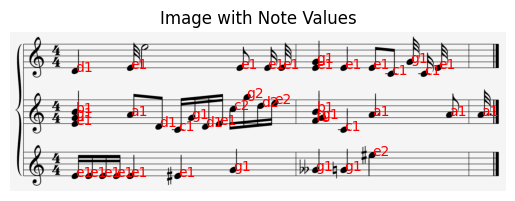

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# print(notes)
t = gap/2.0-3

# 优化后的函数来进行条件判断和键值对分配
def assign_note_values(notes):
    note_values = {}

    for note in notes:
        x, y = note

        # 根据条件调整 y 值
        if y > 366:
            base_value = 386
        elif y > 200:
            base_value = 220
        else:
            base_value = 43


        # 定义音符区间和对应的值范围
        note_ranges = {
          'g2': (base_value - gap/2, t),
          'f2': (base_value, t),
          'e2': (base_value + gap/2, t),
          'd2': (base_value + gap, t),
          'c2': (base_value + 3*gap/2, t),
          'b1': (base_value + 2*gap, t),
          'a1': (base_value + 5*gap/2, t),
          'g1': (base_value + 3*gap, t),
          'f1': (base_value + 7*gap/2, t),
          'e1': (base_value + 4*gap, t),
          'd1': (base_value + 9*gap/2, t),
          'c1': (base_value + 5*gap, t),
      }


        # 检查调整后的 y 值是否在某个定义的区间内
        for note_key, (center, tolerance) in note_ranges.items():
            if center - tolerance <= y <= center + tolerance:
                note_values[note] = note_key

                break

    return note_values

# 执行函数并输出结果
note_values = assign_note_values(notes)
print(note_values)

# 读取图像'
image = gray_image

# 显示图像
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

# 在图像上标注字符串值
for note, value in note_values.items():
    plt.annotate(value, (note[0], note[1]), color='red')

plt.title('Image with Note Values')
plt.axis('off')
plt.show()
